/tmp/ipython-input-1914538994.py:154: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout(rect=[0, 0.05, 1, 0.98])


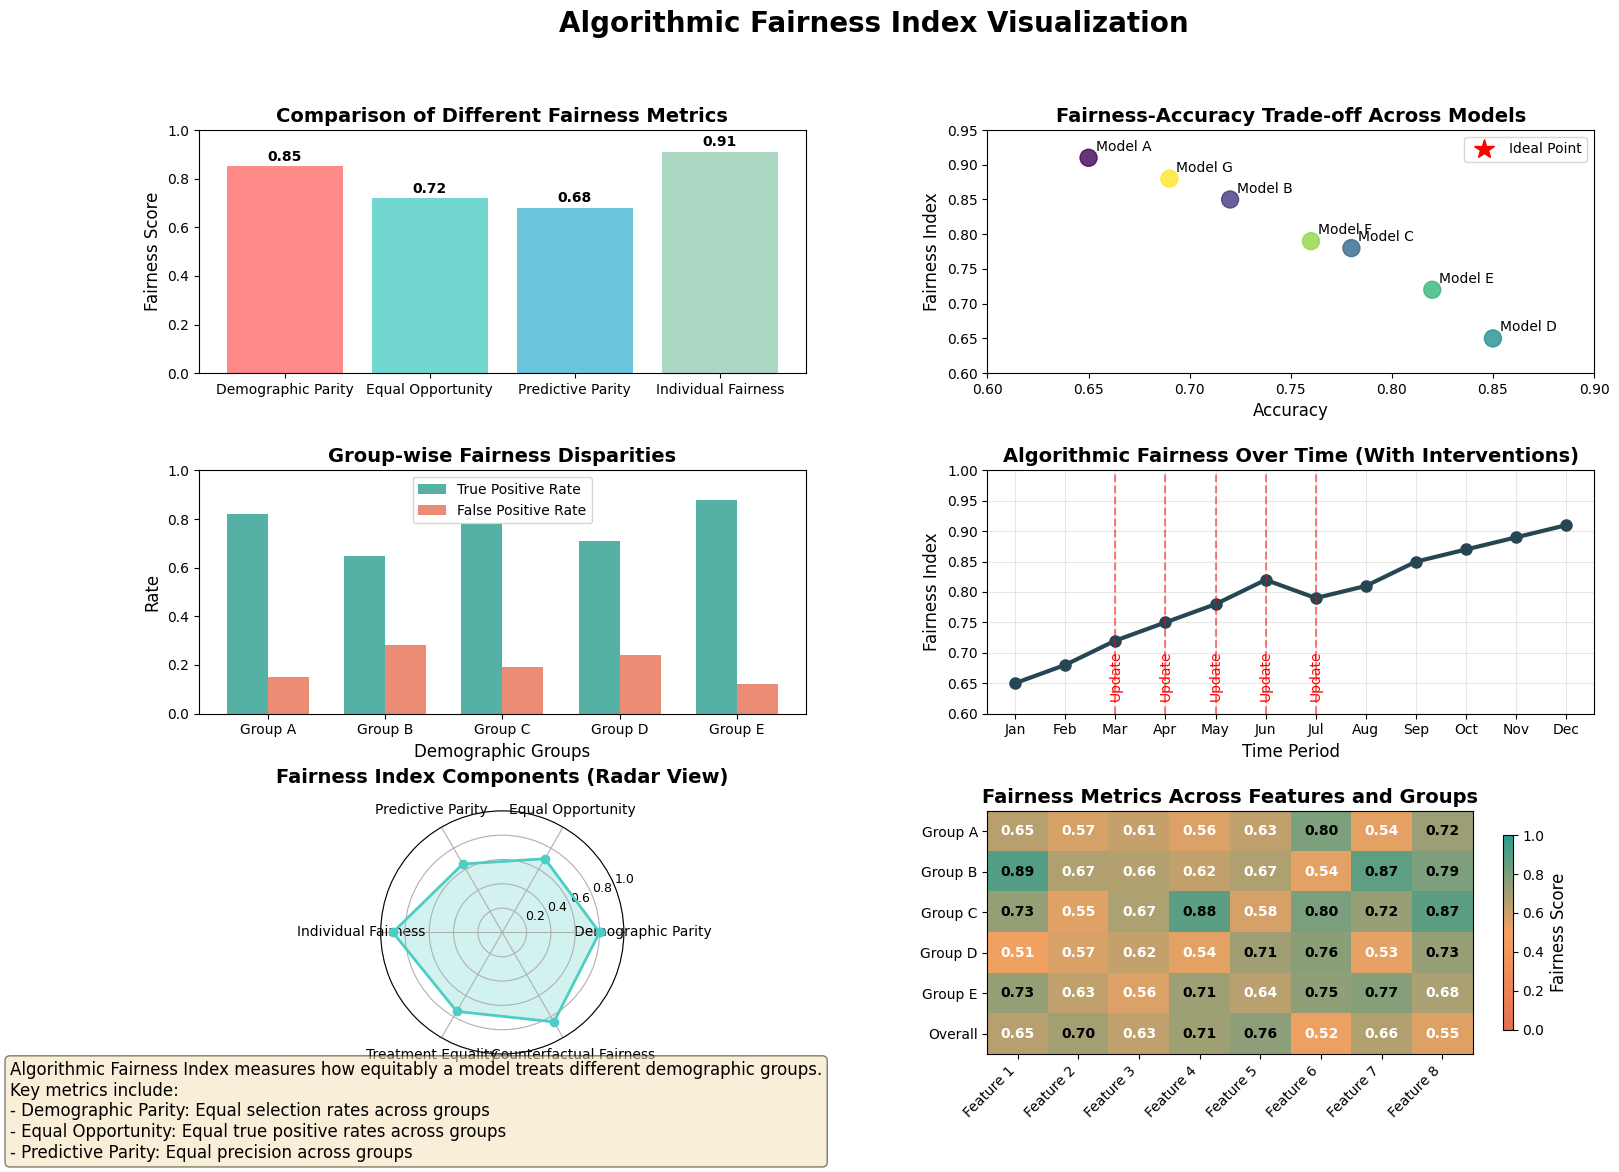

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.patches import Patch, Rectangle
import matplotlib.gridspec as gridspec
from matplotlib.colors import LinearSegmentedColormap

# Set up the style
plt.style.use('default')
plt.rcParams['font.family'] = 'DejaVu Sans'

# Create figure with subplots
fig = plt.figure(figsize=(18, 12))
fig.suptitle('Algorithmic Fairness Index Visualization', fontsize=20, fontweight='bold', y=0.98)

# Create grid layout
gs = gridspec.GridSpec(3, 2, figure=fig, width_ratios=[1, 1], height_ratios=[1, 1, 1], hspace=0.4, wspace=0.3)

# Plot 1: Fairness Metrics Comparison
ax1 = fig.add_subplot(gs[0, 0])
metrics = ['Demographic Parity', 'Equal Opportunity', 'Predictive Parity', 'Individual Fairness']
fairness_scores = [0.85, 0.72, 0.68, 0.91]
colors = ['#FF6B6B', '#4ECDC4', '#45B7D1', '#96CEB4']

bars = ax1.bar(metrics, fairness_scores, color=colors, alpha=0.8)
ax1.set_ylabel('Fairness Score', fontsize=12)
ax1.set_ylim(0, 1)
ax1.set_title('Comparison of Different Fairness Metrics', fontsize=14, fontweight='bold')

# Add value labels on bars
for bar, score in zip(bars, fairness_scores):
    height = bar.get_height()
    ax1.text(bar.get_x() + bar.get_width()/2., height + 0.01,
             f'{score:.2f}', ha='center', va='bottom', fontweight='bold')

# Plot 2: Fairness-Accuracy Trade-off
ax2 = fig.add_subplot(gs[0, 1])
accuracy = [0.65, 0.72, 0.78, 0.85, 0.82, 0.76, 0.69]
fairness = [0.91, 0.85, 0.78, 0.65, 0.72, 0.79, 0.88]
models = ['Model A', 'Model B', 'Model C', 'Model D', 'Model E', 'Model F', 'Model G']

scatter = ax2.scatter(accuracy, fairness, s=150, c=range(len(models)), cmap='viridis', alpha=0.8)
ax2.set_xlabel('Accuracy', fontsize=12)
ax2.set_ylabel('Fairness Index', fontsize=12)
ax2.set_title('Fairness-Accuracy Trade-off Across Models', fontsize=14, fontweight='bold')
ax2.set_xlim(0.6, 0.9)
ax2.set_ylim(0.6, 0.95)

# Add model labels
for i, model in enumerate(models):
    ax2.annotate(model, (accuracy[i], fairness[i]), xytext=(5, 5), textcoords='offset points')

# Add a perfect fairness-accuracy point
ax2.plot(1.0, 1.0, 'r*', markersize=15, label='Ideal Point')
ax2.legend()

# Plot 3: Group-wise Fairness Disparities
ax3 = fig.add_subplot(gs[1, 0])
groups = ['Group A', 'Group B', 'Group C', 'Group D', 'Group E']
true_positive_rates = [0.82, 0.65, 0.78, 0.71, 0.88]
false_positive_rates = [0.15, 0.28, 0.19, 0.24, 0.12]

x = np.arange(len(groups))
width = 0.35

bars1 = ax3.bar(x - width/2, true_positive_rates, width, label='True Positive Rate', color='#2A9D8F', alpha=0.8)
bars2 = ax3.bar(x + width/2, false_positive_rates, width, label='False Positive Rate', color='#E76F51', alpha=0.8)

ax3.set_xlabel('Demographic Groups', fontsize=12)
ax3.set_ylabel('Rate', fontsize=12)
ax3.set_title('Group-wise Fairness Disparities', fontsize=14, fontweight='bold')
ax3.set_xticks(x)
ax3.set_xticklabels(groups)
ax3.legend()
ax3.set_ylim(0, 1)

# Plot 4: Fairness Over Time (Algorithmic Auditing)
ax4 = fig.add_subplot(gs[1, 1])
time_periods = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
fairness_index = [0.65, 0.68, 0.72, 0.75, 0.78, 0.82, 0.79, 0.81, 0.85, 0.87, 0.89, 0.91]
algorithm_updates = [2, 3, 5, 4, 6, 5, 4, 3, 2, 3, 2, 1]

ax4.plot(time_periods, fairness_index, 'o-', linewidth=3, markersize=8, color='#264653', label='Fairness Index')
ax4.set_xlabel('Time Period', fontsize=12)
ax4.set_ylabel('Fairness Index', fontsize=12)
ax4.set_title('Algorithmic Fairness Over Time (With Interventions)', fontsize=14, fontweight='bold')
ax4.set_ylim(0.6, 1.0)
ax4.grid(True, alpha=0.3)

# Add algorithm updates as vertical lines
for i, update in enumerate(algorithm_updates):
    if update >= 4:  # Only show significant updates
        ax4.axvline(x=i, color='red', linestyle='--', alpha=0.5)
        ax4.text(i, 0.62, f'Update', rotation=90, va='bottom', ha='center', color='red')

# Plot 5: Fairness Index Components (Radar Chart)
ax5 = fig.add_subplot(gs[2, 0], polar=True)
categories = ['Demographic Parity', 'Equal Opportunity',
              'Predictive Parity', 'Individual Fairness',
              'Treatment Equality', 'Counterfactual Fairness']
N = len(categories)

values = [0.8, 0.7, 0.65, 0.9, 0.75, 0.85]
values += values[:1]  # Complete the circle

angles = [n / float(N) * 2 * np.pi for n in range(N)]
angles += angles[:1]

ax5.plot(angles, values, 'o-', linewidth=2, color='#4ECDC4')
ax5.fill(angles, values, alpha=0.25, color='#4ECDC4')
ax5.set_xticks(angles[:-1])
ax5.set_xticklabels(categories, fontsize=10)
ax5.set_yticks([0.2, 0.4, 0.6, 0.8, 1.0])
ax5.set_yticklabels(['0.2', '0.4', '0.6', '0.8', '1.0'], fontsize=9)
ax5.set_ylim(0, 1)
ax5.set_title('Fairness Index Components (Radar View)', fontsize=14, fontweight='bold', pad=20)

# Plot 6: Algorithmic Fairness Heatmap
ax6 = fig.add_subplot(gs[2, 1])
# Create synthetic data for heatmap
data = np.random.rand(6, 8)
data = (data * 0.4) + 0.5  # Scale to 0.5-0.9 range

# Create custom colormap from red to green
cmap = LinearSegmentedColormap.from_list('fairness_cmap', ['#E76F51', '#F4A261', '#2A9D8F'])

im = ax6.imshow(data, cmap=cmap, aspect='auto', vmin=0, vmax=1)

# Set labels
ax6.set_xticks(np.arange(8))
ax6.set_yticks(np.arange(6))
ax6.set_xticklabels([f'Feature {i+1}' for i in range(8)], rotation=45, ha='right')
ax6.set_yticklabels(['Group A', 'Group B', 'Group C', 'Group D', 'Group E', 'Overall'])

# Add text annotations
for i in range(6):
    for j in range(8):
        text = ax6.text(j, i, f'{data[i, j]:.2f}',
                       ha="center", va="center", color="white" if data[i, j] < 0.7 else "black", fontweight='bold')

ax6.set_title('Fairness Metrics Across Features and Groups', fontsize=14, fontweight='bold')
cbar = plt.colorbar(im, ax=ax6, shrink=0.8)
cbar.set_label('Fairness Score', fontsize=12)

# Add a text box with explanation
text_str = """Algorithmic Fairness Index measures how equitably a model treats different demographic groups.
Key metrics include:
- Demographic Parity: Equal selection rates across groups
- Equal Opportunity: Equal true positive rates across groups
- Predictive Parity: Equal precision across groups"""

props = dict(boxstyle='round', facecolor='wheat', alpha=0.5)
fig.text(0.02, 0.02, text_str, fontsize=12, verticalalignment='bottom', bbox=props)

plt.tight_layout(rect=[0, 0.05, 1, 0.98])
plt.show()